## LinearRegression BaseLine Model to predict  **water temperature** (T_degC)

- Our first goal is building simpe baseline (benchmark) and either improve it or introduce other complex ideas
- The main purpose of a baseline model is to provide a point of comparison

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### reading the data

In [2]:
# make a dataframe to read the data
df = pd.read_csv("bottle.csv")
df.head()

C:\Users\AHMED\AppData\Local\Temp\ipykernel_9224\519655703.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.options.display.max_columns = None
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# explore and understand characteristcs of the data

# Shape of the data
df.shape

(864863, 74)

- Do fast check for what are your columns
- How many NA elements per column
- Drop columns with excessive NA elements
- What are column data types? date, string, intger, float, etc
- Either drop rows with NA elements or do simple replacements

In [5]:
# check how many NA elements per column
df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

- Let's find columns with little missing elements (maybe 7%?)

In [6]:
#  columns with excessive NA elements
columns = [col for col in df.columns if (df[col].isnull().sum() / df.shape[0]) <= 0.07]
print(columns)
print(f"we will delete {df.shape[1] - len(columns)} ")

['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC', 'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES']
we will delete 50 


In [7]:
# slicing this columns from the whole data
df = df[columns]

- Explore the data types of the remaining columns

In [8]:
# Get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Cst_Cnt     864863 non-null  int64  
 1   Btl_Cnt     864863 non-null  int64  
 2   Sta_ID      864863 non-null  object 
 3   Depth_ID    864863 non-null  object 
 4   Depthm      864863 non-null  int64  
 5   T_degC      853900 non-null  float64
 6   Salnty      817509 non-null  float64
 7   STheta      812174 non-null  float64
 8   RecInd      864863 non-null  int64  
 9   T_prec      853900 non-null  float64
 10  S_prec      817509 non-null  float64
 11  NH3q        808299 non-null  float64
 12  C14A1q      848605 non-null  float64
 13  C14A2q      848623 non-null  float64
 14  DarkAq      840440 non-null  float64
 15  MeanAq      840439 non-null  float64
 16  R_Depth     864863 non-null  float64
 17  R_TEMP      853900 non-null  float64
 18  R_POTEMP    818816 non-null  float64
 19  R_

- Data frame Data types: 

    - 17 columns are float 
    - 5 cols are int
    - 2 cols are object 


In [9]:
df.select_dtypes("object").head()

,Sta_ID,Depth_ID
0,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7


- Seems maynot be so informative string columns
- We can remove for now
- But maybe we return them later and encode them (e.g. Hash Encoding)

In [10]:
df.drop(["Sta_ID", "Depth_ID"], axis=1, inplace=True)

In [11]:
df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,0,10.50,33.440,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,0
1,1,2,8,10.46,33.440,25.656,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,8
2,1,3,10,10.46,33.437,25.654,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,10
3,1,4,19,10.45,33.420,25.643,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,19
4,1,5,20,10.45,33.421,25.643,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,20


- Time to deal with missing elements
- Given the volume of data, a SIMPLE solution is just to remove

In [12]:
df.isnull().sum()

Cst_Cnt           0
Btl_Cnt           0
Depthm            0
T_degC        10963
Salnty        47354
STheta        52689
RecInd            0
T_prec        10963
S_prec        47354
NH3q          56564
C14A1q        16258
C14A2q        16240
DarkAq        24423
MeanAq        24424
R_Depth           0
R_TEMP        10963
R_POTEMP      46047
R_SALINITY    47354
R_SIGMA       52856
R_SVA         52771
R_DYNHT       46657
R_PRES            0
dtype: int64

In [13]:
# before we remove nulls data
df.shape

(864863, 22)

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df.isnull().sum()

Cst_Cnt       0
Btl_Cnt       0
Depthm        0
T_degC        0
Salnty        0
STheta        0
RecInd        0
T_prec        0
S_prec        0
NH3q          0
C14A1q        0
C14A2q        0
DarkAq        0
MeanAq        0
R_Depth       0
R_TEMP        0
R_POTEMP      0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

In [16]:
# after getting rid of the nulls
df.shape

(733418, 22)

- Next step is encoding this data, which is mix of int and float
- First explore their statistics, especially std
- For Large values or large std, we may apply log function
- Let's first explore the integer columns

In [17]:
# selecting Integer datatypes columns
df_int = df.select_dtypes(include=["int64"])
# selecting float datatypes columns
df_float = df.select_dtypes(include=["float64"])

df_int.head()

,Cst_Cnt,Btl_Cnt,Depthm,RecInd,R_PRES
0,1,1,0,3,0
1,1,2,8,3,8
2,1,3,10,7,10
3,1,4,19,3,19
4,1,5,20,7,20


In [18]:
# let's get some statistics
df_int.describe()

,Cst_Cnt,Btl_Cnt,Depthm,RecInd,R_PRES
count,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000
mean,16421.194724,414217.185100,228.062580,4.723822,229.580553
std,9482.694845,230069.296792,309.103372,1.865705,312.359267
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,8492.000000,222666.250000,50.000000,3.000000,50.000000
50%,15633.000000,412554.500000,125.000000,3.000000,126.000000
75%,24876.000000,608509.750000,300.000000,7.000000,302.000000
max,34404.000000,864861.000000,5351.000000,7.000000,5458.000000


- All the variables except RecInd has large values or std. Let's log them
- RecInd seems normal categorical info. No metadata from the dataset, although seems some index
- Let's see a histogram of RecInd

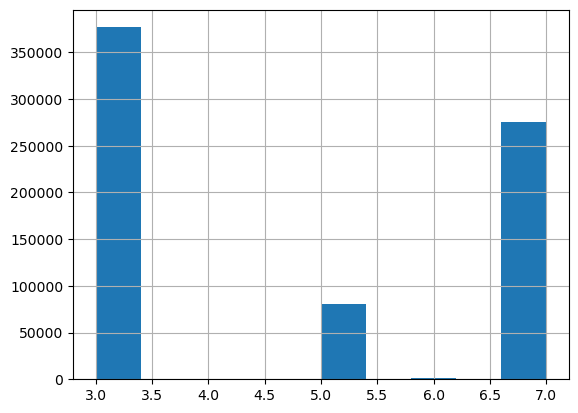

In [19]:
# histogram of RecInd
df["RecInd"].hist(grid=True)
plt.show()

In [20]:
# the unique values of the RecInd
df["RecInd"].value_counts(ascending=False)

RecInd
3    376861
7    275121
5     80506
6       928
4         2
Name: count, dtype: int64

- Let's convert to one hot encoding

In [21]:
# Note, it will map the available 4 classes to {0, 1, 2, 3}
# df = pd.get_dummies(df, columns=["RecInd"])
# df.head()

In [22]:
df["RecInd"].head()

0    3
1    3
2    7
3    3
4    7
Name: RecInd, dtype: int64

In [23]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one_hot encodig to the RecInd column
RecInd_encoded = encoder.fit_transform(df["RecInd"].to_numpy().reshape((-1, 1)))

# print(RecInd_encoded.shape)   #(733418, 5)

# create a dataframe to concatnate RecInd_encoded data with the original df
RecInd_encoded_df = pd.DataFrame(
    RecInd_encoded, columns=encoder.get_feature_names_out(["RecInd"])
)

RecInd_encoded_df.shape

(733418, 5)

In [24]:
# Ensure the indices of both DataFrames are aligned
df = df.reset_index(drop=True)
RecInd_encoded_df = RecInd_encoded_df.reset_index(drop=True)

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, RecInd_encoded_df], axis=1)

# drop RecInd original column
df.drop(columns=["RecInd"], axis=1, inplace=True)

# display the dataframe
df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES,RecInd_3,RecInd_4,RecInd_5,RecInd_6,RecInd_7
0,1,1,0,10.50,33.440,25.649,1.0,2.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,0,1.0,0.0,0.0,0.0,0.0
1,1,2,8,10.46,33.440,25.656,2.0,2.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,8,1.0,0.0,0.0,0.0,0.0
2,1,3,10,10.46,33.437,25.654,2.0,3.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,10,0.0,0.0,0.0,0.0,1.0
3,1,4,19,10.45,33.420,25.643,2.0,2.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,19,1.0,0.0,0.0,0.0,0.0
4,1,5,20,10.45,33.421,25.643,2.0,3.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,20,0.0,0.0,0.0,0.0,1.0


In [25]:
df.isnull().sum()

Cst_Cnt       0
Btl_Cnt       0
Depthm        0
T_degC        0
Salnty        0
STheta        0
T_prec        0
S_prec        0
NH3q          0
C14A1q        0
C14A2q        0
DarkAq        0
MeanAq        0
R_Depth       0
R_TEMP        0
R_POTEMP      0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
RecInd_3      0
RecInd_4      0
RecInd_5      0
RecInd_6      0
RecInd_7      0
dtype: int64

- Let's convert others using log1p function

In [26]:
log_int_cols = [col for col in df_int.columns if col != "RecInd"]
for col in log_int_cols:
    df[col] = np.log1p(df[col])

- Let's explore float variables

In [27]:
df_float.describe()

,T_degC,Salnty,STheta,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT
count,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000
mean,10.764656,33.861743,25.848316,2.018854,2.694038,8.944438,8.999992,8.999992,8.999992,8.999992,228.063188,10.764664,10.742996,33.861723,25.843458,217.910797,0.447131
std,4.242786,0.460998,1.180908,0.154670,0.460814,0.524139,0.002860,0.002860,0.002860,0.002860,309.103071,4.242788,4.259768,0.461000,1.133141,93.118892,0.388606
min,1.440000,28.431000,20.934000,1.000000,2.000000,4.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1.440000,0.000000,28.431000,20.934000,0.400000,0.000000
25%,7.670000,33.510000,25.004000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,50.000000,7.670000,7.640000,33.510000,25.000000,142.200000,0.150000
50%,9.980000,33.900000,26.043000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,125.000000,9.980000,9.970000,33.900000,26.040000,198.300000,0.360000
75%,13.780000,34.210000,26.661000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,300.000000,13.780000,13.770000,34.210000,26.660000,295.700000,0.650000
max,31.140000,37.034000,250.784000,3.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5351.000000,31.140000,31.140000,37.034000,250.784000,683.400000,3.880000


- Seems all of them are fine
- Except R_Depth has std 309
- We may leave it for scaling or try log over it first

In [28]:
df["R_Depth"] = np.log1p(df["R_Depth"])

In [29]:
# Extract the target and remove from columns
# Observe columns variable is old now as we updated df
y = df[["T_degC"]]
df.drop(columns=["T_degC"], inplace=True)
X = df
X_train, X_val, t_train, t_val = train_test_split(X, y, test_size=0.2, random_state=17)

In [30]:
X_train.shape, t_train.shape, X_val.shape, t_val.shape

((586734, 25), (586734, 1), (146684, 25), (146684, 1))

In [31]:
# let's define function to scale the input data without data leakage
def transform_train_val(X_train, X_val):
    # define the scaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    # scale the validation data by the x_train_transformer
    X_val_scaled = scaler.transform(X_val)

    return X_train_scaled, X_val_scaled

In [32]:
X_train, X_val = transform_train_val(X_train, X_val)

In [33]:
# train the model
model = LinearRegression()
model.fit(X_train, t_train)

LinearRegression()

In [34]:
# let's predict the train input data
y_train_pred = model.predict(X_train)
print(r2_score(t_train, y_train_pred))

0.9999999929473696


In [35]:
# let's predict the val data
y_pred_val = model.predict(X_val)
r2_score(t_val, y_pred_val)

0.9999999928467862

### Store model in file system


In [36]:
import pickle

# save the model to disk
model_filename = "model.pkl"
pickle.dump(model, open(model_filename, "wb"))

### How to load back from the file system

In [37]:
loaded_model = pickle.load(open("model.pkl", "rb"))

input_data = X_val[0].reshape((1, -1))
prediction = loaded_model.predict(input_data)
print("the prediction is :", prediction[0][0])

the prediction is : 1.939939022064209
